<a href="https://colab.research.google.com/github/hyeong8465/KTB/blob/main/ktb_ai/ktb_day0711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
데이터 시각화 2
- 고급 차트 유형
heatmap: 행렬 형식의 데이터를 색상으로 시각화
treemap: 계층적 데이터를 직사각형으로 시각화하여 데이터의 크기와 비율을 나타냄
bubble chart: 산점도의 확장, 버블의 위치(x,y)와 크기(value) 총 3가지 요소로 시각화
radar chart: 여러 변수를 다각형으로 시각화
sankey diagram: 데이터의 흐름과 비율을 시각화

- 데이터 형태에 따른 시각화
다변량 데이터
    데이터 세트를 이해하고 해석하는 데 이점
    산점도, 평행좌표, 히트맵, 체르노프 페이스(잘 안씀)
시계열 데이터
    추세 확인
    선 그래프, 히트맵, 캘린더 차트
지리 데이터
    공간적 패턴과 관계를 파악
    지도

- 인터렉티브 시각화
사용자와 상호작용(클릭, 확대 축소, 필터링)할 수 있는 시각화 방법
사용자의 참여를 유도하고 이해를 증진시킴
과도한 상호작용, 데이터 정확성, 성능 최적화에 유의해야 됨

슬라이서(특정 범위를 선택할 수 있는 슬라이드 바)
드롭다운 메뉴(여러 옵션 중 하나를 선택하는 메뉴)
버튼(특정 동작을 실행하는 버튼)
다중 축(두 개 이상의 축을 사용하여 여러 변수 동시에 시각화)
연결된 시각화(하나의 시각화에서 선택한 데이터가 다른 시각화에 반영)

- 시각화의 디자인 원칙
목적성, 간결성, 명확성, 정보의 계층구조, 일관성, 접근성

- 시각화와 스토리텔링
데이터의 흐름을 스토리 형태로 전달하면 기억에 오래 남게 됨

- 강조
색상, 텍스트, 크기, 애니메이션
'''

#실습

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
! kaggle datasets download -d nikhil7280/weather-type-classification
! unzip weather-type-classification.zip


Dataset URL: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
License(s): other
weather-type-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  weather-type-classification.zip
replace weather_classification_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [36]:
df = pd.read_csv('weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


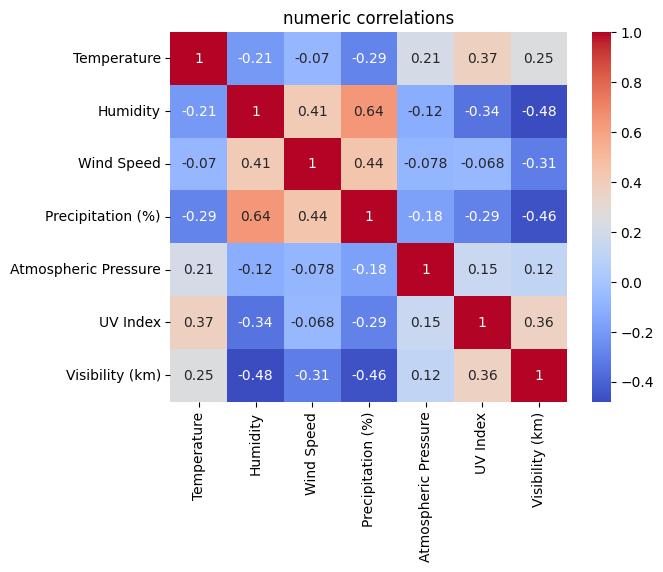

In [38]:
# heatmap
df_cor = df.select_dtypes(['float64', 'int64']).corr()
sns.heatmap(df_cor, annot=True, cmap='coolwarm')
plt.title('numeric correlations')
plt.show()

In [39]:
# treemap
import plotly.express as px
import numpy as np
fig = px.treemap(df, path =[px.Constant('Weather'), 'Location', 'Weather Type'], values = 'Precipitation (%)',
                color = 'Humidity' , color_continuous_scale='RdBu',
                color_continuous_midpoint=np.average(df['Humidity']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# 상자의 크기는 Precipitation, 색상은 Humidity

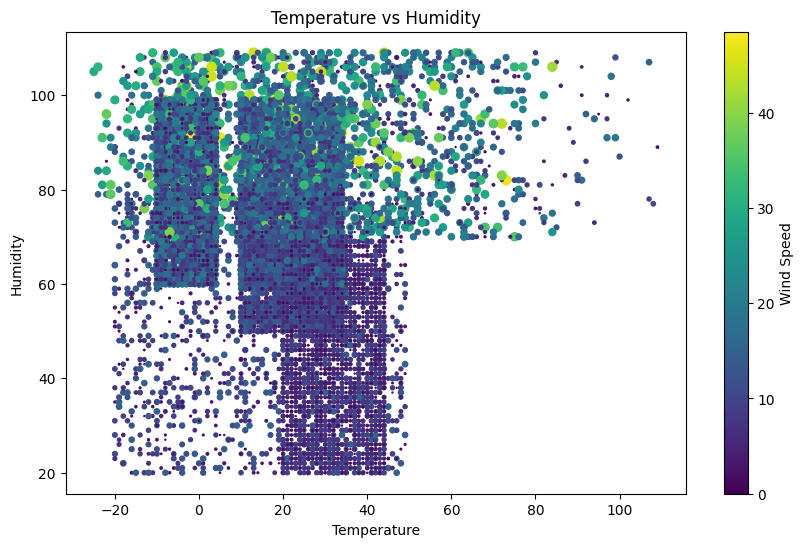

In [45]:
# bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(x = df['Temperature'], y = df['Humidity'], s = df['Wind Speed'],c = df['Wind Speed'])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity')
plt.colorbar(label='Wind Speed')
plt.show()


In [48]:
display(df_location_mean)
df_location_mean.index

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
Location,,,,,,,
coastal,25.665640,65.320919,9.525203,47.663400,1010.890865,4.724447,6.114674
inland,16.827243,70.235257,10.076308,56.145349,1004.536742,3.780731,5.181167
mountain,16.578433,69.700603,9.815707,55.579472,1003.363391,3.697694,5.261272


Index(['coastal', 'inland', 'mountain'], dtype='object', name='Location')

          Temperature   Humidity  Wind Speed  Precipitation (%)  \
Location                                                          
coastal     25.665640  65.320919    9.525203          47.663400   
inland      16.827243  70.235257   10.076308          56.145349   
mountain    16.578433  69.700603    9.815707          55.579472   

          Atmospheric Pressure  UV Index  Visibility (km)  
Location                                                   
coastal            1010.890865  4.724447         6.114674  
inland             1004.536742  3.780731         5.181167  
mountain           1003.363391  3.697694         5.261272  


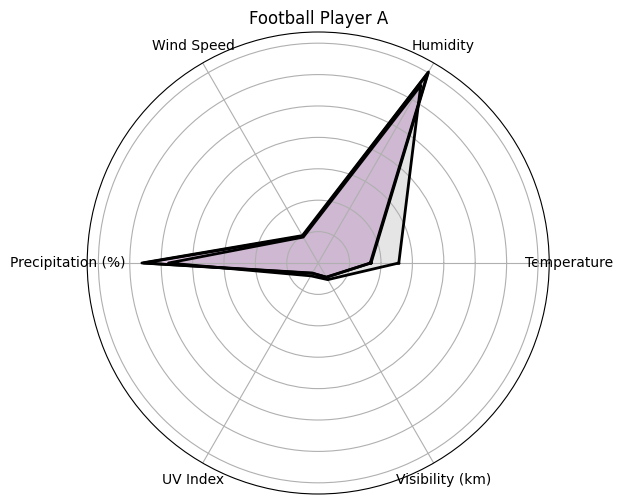

In [57]:
# radar chart
# 변수의 scale이 어느정도 맞아야 예쁘게 그려짐
df_location_mean = df.groupby('Location').mean(numeric_only=True)
print(df_location_mean)
del df_location_mean['Atmospheric Pressure']

labels = df_location_mean.columns.tolist()
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for i,j in zip(df_location_mean.index, ['black', 'red', 'blue']):

    values = df_location_mean.loc[i].values.tolist()
    values += values[:1]
    ax.fill(angles, values, color=j, alpha=0.1)
    ax.plot(angles, values, color='black', linewidth=2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Football Player A')
plt.show()

In [13]:
# sanky diagram

In [14]:
# interactive

In [40]:
# 지리 정보 데이터 시각화
# geopandas
# folium